<font face = 'times' size = 11><h1 align = 'center'>Selayang Pandang</h1></font>

<img src = 'gambar/jupyter.png'>

<font size = 5><b>Keunggulan Jupyter Notebook:</b>
    1. Tampilan yang menarik
    2. Keyboard Shortcut
    3. Magic commands
    4. Plotting yang menarik 
</font>

In [27]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import emcee
import corner

<font size = 5> <b> Magic Commands </b> </font>

In [14]:
%time a = np.random.randn(10_000_00) #mengetahui computational time

CPU times: user 48.4 ms, sys: 30 µs, total: 48.4 ms
Wall time: 50.9 ms


<IPython.core.display.Javascript object>


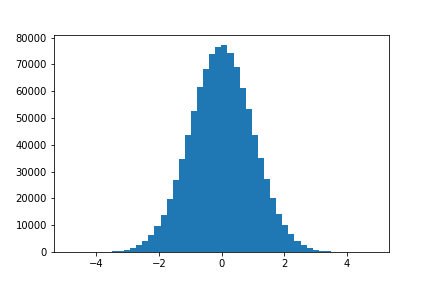

CPU times: user 106 ms, sys: 193 µs, total: 106 ms
Wall time: 104 ms


In [29]:
f = plt.figure()
%time plt.hist(a, bins = 50)  
plt.show()

In [22]:
%psource np.random  #mengetahui code yang digunakan

## Opsi plotting 

<font face = 'times' size = 11><h1 align = 'center'>Monte Carlo</h1></font>

<img src = 'gambar/monaco.jpg'>

Ada beberapa metode dalam menghasilkan bilangan acak:
    1. Inversion Transform Method
    2. Acceptance-Rejection Method
    3. Box-Muller Method
  
Bisa dibaca di <a href='https://www.win.tue.nl/~marko/2WB05/lecture8.pdf'>link berikut</a>

In [33]:
%%html
<iframe src = 'https://www.win.tue.nl/~marko/2WB05/lecture8.pdf' width = '950' height = '900'></iframe>

## Menggunakan Numpy

CPU times: user 125 ms, sys: 30.5 ms, total: 155 ms
Wall time: 156 ms


<IPython.core.display.Javascript object>


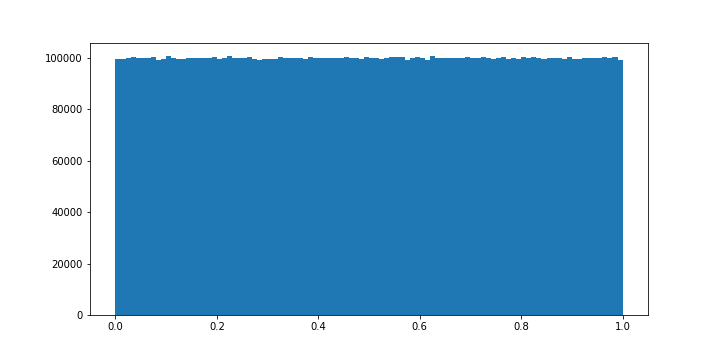

In [52]:
%time acak_uni = np.random.random(10_000_000)
fig = plt.figure(figsize=(10, 5))
plt.hist(acak_uni, bins = 100);

CPU times: user 356 ms, sys: 22.8 ms, total: 379 ms
Wall time: 380 ms


<IPython.core.display.Javascript object>


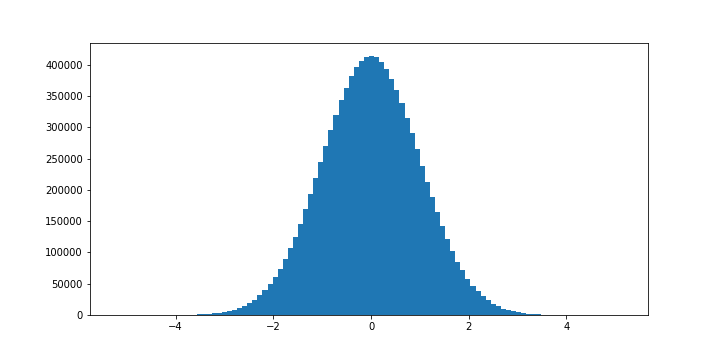

In [53]:
%time acak_norm = np.random.randn(10_000_000)
fig = plt.figure(figsize=(10, 5))
plt.hist(acak_norm, bins = 100);

<font face = 'sans' size = 11><h1 align = 'center'>emcee</h1></font>

<a href ='https://arxiv.org/abs/1202.3665'><img src = 'gambar/emcee.png'></a>

## Generate Data 

<IPython.core.display.Javascript object>


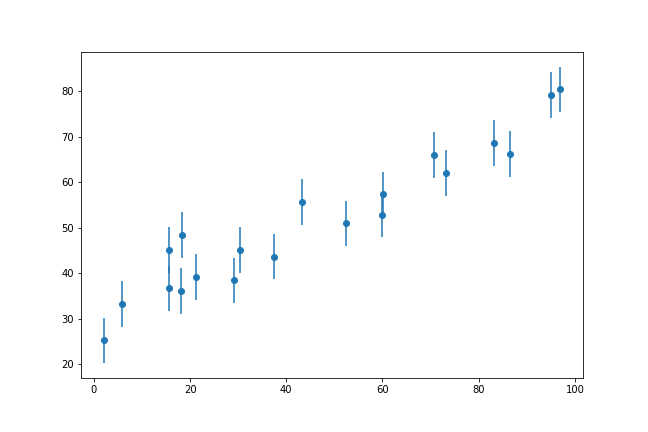

<ErrorbarContainer object of 3 artists>

In [50]:
def make_data(intercept, slope, N=20, dy=5, rseed=42):  #fungsi generate data
    rand = np.random.RandomState(rseed)
    x = 100 * rand.rand(N)
    y = intercept + slope * x
    y += dy * rand.randn(N)
    return x, y, dy * np.ones_like(x)

x, y, dy = make_data(30, 0.5) #masukkan nilai intercept dan slope

fig = plt.figure(figsize=(9, 6))
plt.errorbar(x, y, dy, fmt='o')


# Fungsi Prior, Likelihood, dan Posterior

In [51]:
def log_prior(theta):
    if np.all(np.abs(theta) < 1000): 
        return 0
    else:
        return -np.inf  # log(0)
    
def log_likelihood(theta, x, y, dy):
    y_model = theta[0] + theta[1] * x
    return -0.5 * np.sum(np.log(2 * np.pi * dy ** 2) + (y - y_model) ** 2 / dy ** 2)

def log_posterior(theta, x, y, dy):
    return log_prior(theta) + log_likelihood(theta, x, y, dy)

<IPython.core.display.Javascript object>


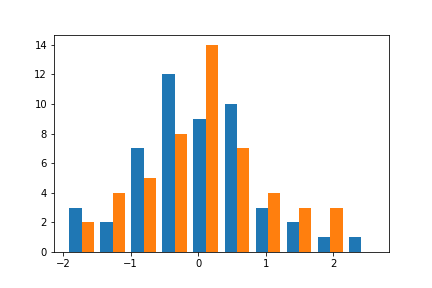

In [93]:
ndim = 2  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers

# initialize walkers
starting_guesses = np.random.randn(nwalkers, ndim)

fig = plt.figure()
plt.hist(starting_guesses)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[x, y, dy])
pos, prob, state = sampler.run_mcmc(starting_guesses, 1000)

<IPython.core.display.Javascript object>


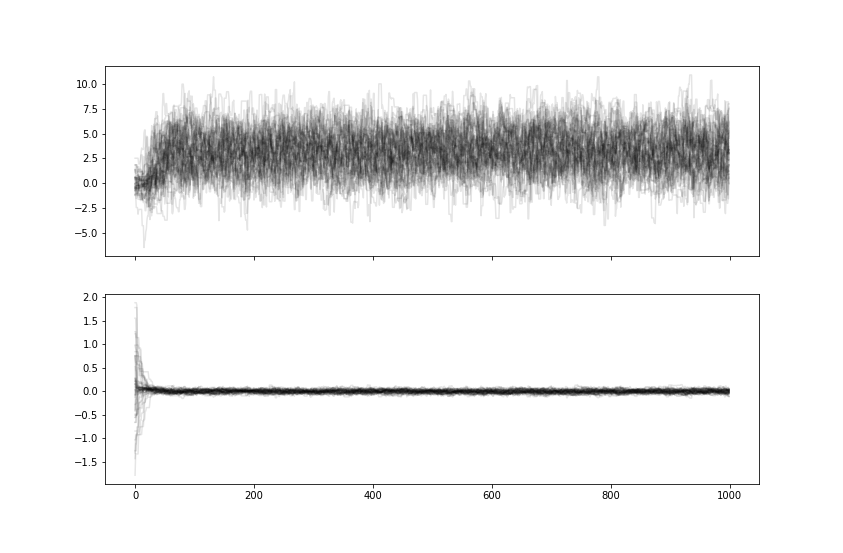

In [94]:
fig, ax = plt.subplots(2, sharex=True)
for i in range(2):
    ax[i].plot(sampler.chain[:, :, i].T, 'k', alpha=0.1);

In [83]:
sampler.reset()
pos, prob, state = sampler.run_mcmc(pos, 1000)

<IPython.core.display.Javascript object>


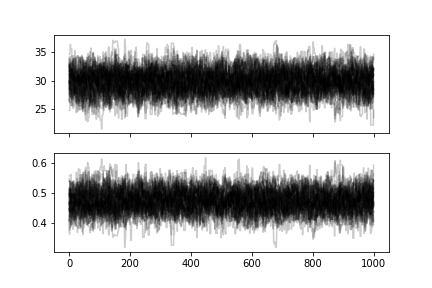

In [84]:
fig, ax = plt.subplots(2, sharex=True)
for i in range(2):
    ax[i].plot(sampler.chain[:, :, i].T, 'k', alpha=0.2);

<IPython.core.display.Javascript object>


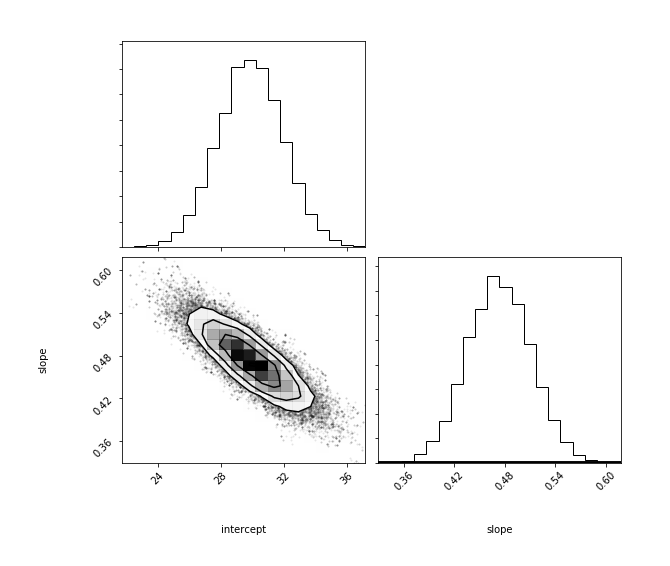

In [71]:
import corner
corner.corner(sampler.flatchain, labels=['intercept', 'slope']);

<IPython.core.display.Javascript object>


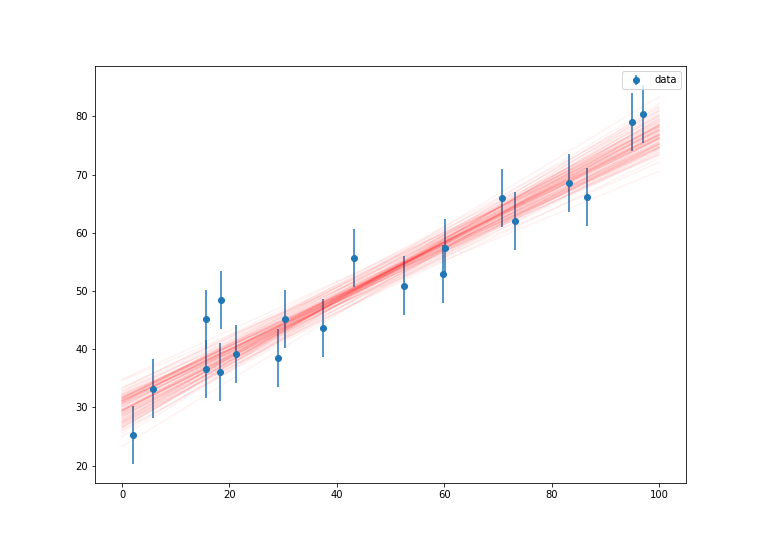

In [79]:
chain = sampler.flatchain
fig = plt.figure()
plt.errorbar(x, y, dy, fmt='o', label = 'data');

thetas = [chain[i] for i in np.random.choice(chain.shape[0], 100)]

xfit = np.linspace(0, 100)
for i in range(100):
    theta = thetas[i]
    plt.plot(xfit, theta[0] + theta[1] * xfit, color='r', alpha=0.05);
plt.legend()